#**DATASET Agri-food CO2 emission dataset - Forecasting**

*El dataset se ha creado a partir de la combinación de varios conjuntos de datos de la Organización de las Naciones Unidas para la Alimentación y la Agricultura (FAO) y del Panel Intergubernamental sobre Cambio Climático (IPCC).
Los datos han sido limpiados, preprocesados y combinados para proporcionar una visión integral de las emisiones de CO2 relacionadas con la agroalimentación.*

1. Las emisiones de CO2 del sector agroalimentario representan aproximadamente el 62% de las emisiones anuales globales.
Esto subraya la importancia de este sector en el contexto del cambio climático y la necesidad de comprender y mitigar su impacto ambiental.

2. Las emisiones de CO2 y otros gases de efecto invernadero, especialmente provenientes del sector agroalimentario, contribuyen significativamente al calentamiento global. Este calentamiento está relacionado con el aumento de las temperaturas globales, lo que tiene una serie de efectos adversos tanto en el medio ambiente como en la salud humana y el bienestar de la población en general.

3. Las emisiones de CO2, especialmente aquellas derivadas de actividades agrícolas y de uso de la tierra, tienen un impacto directo en el calentamiento global y, por lo tanto, en la temperatura global. Este calentamiento global afecta a toda la población, tanto en términos de salud como de seguridad alimentaria, y tiene consecuencias ambientales de largo alcance

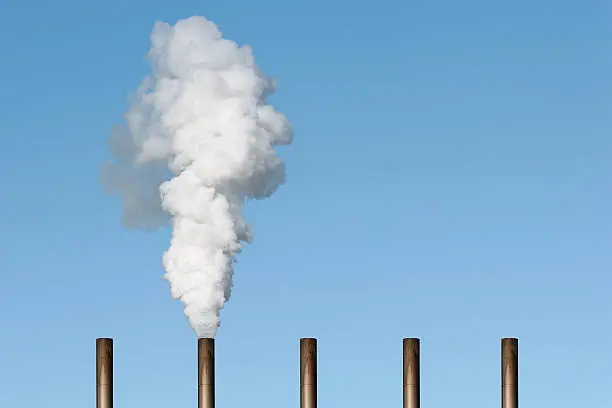

#**Posibles soluciones**

* La transición de fuentes de energía basadas en combustibles fósiles (como el carbón, el petróleo y el gas natural) a fuentes de energía renovable (como la solar, eólica, hidroeléctrica y geotérmica) es una de las estrategias más efectivas para reducir las emisiones de CO2. Según varios estudios, el aumento en el uso de energías renovables ha reducido significativamente las emisiones de CO2 en muchos países. Por ejemplo, Jacobson et al. (2017) han modelado un escenario en el que el mundo podría funcionar en un 100% con energía renovable para 2050, reduciendo drásticamente las emisiones globales de CO2 .

* La agricultura sostenible incluye prácticas como la agricultura de conservación, la rotación de cultivos, la agroforestería, la reducción del uso de fertilizantes y pesticidas químicos, y el manejo eficiente del estiércol. También implica la protección de los bosques y la restauración de tierras degradadas. Según un informe de Smith et al. (2019), las prácticas agrícolas sostenibles pueden reducir las emisiones de gases de efecto invernadero y aumentar la capacidad de los suelos para almacenar carbono. Además, la reforestación y la evitación de la deforestación son estrategias clave para la mitigación del cambio climático, con un potencial de captura de CO2 significativo

## **Diagrama de solucion**
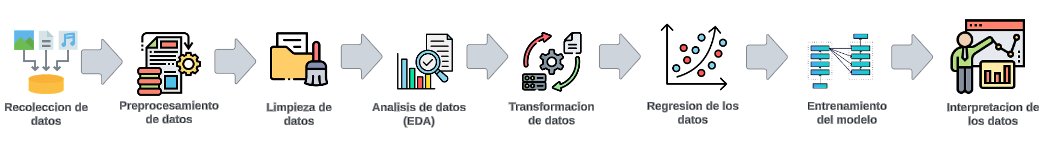

##**Recoleccion de datos**

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sklearn
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp '/content/drive/MyDrive/kaggle.json' /content/

In [4]:
seed = 42

In [5]:
#Crear carpeta de kaggle
!mkdir ~/.kaggle
#Copio archivo de kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml

Dataset URL: https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml
License(s): CC0-1.0
agri-food-co2-emission-dataset-forecasting-ml.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
df1=pd.read_csv('agri-food-co2-emission-dataset-forecasting-ml.zip',header=None)
df1.head().style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'black'})
#

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
1,Afghanistan,1990,14.7237,0.0557,205.6077,686.0,0.0,11.807482956246297,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.63136607385836,691.7888,252.2141899664796,11.997,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,nan,9655167.0,2593947.0,5348387.0,5346409.0,2198.9635389965842,0.5361666666666667
2,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073091310696,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.63136607385836,710.8212,252.2141899664796,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,nan,10230490.0,2763167.0,5372959.0,5372208.0,2323.8766291316488,0.02066666666666665
3,Afghanistan,1992,14.7237,0.0557,196.5341,686.0,0.0,11.712073091310696,53.317,-2388.803,0.0,80.7692,126.1721,9.2752,67.63136607385836,743.6751,252.2141899664796,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,nan,10995568.0,2985663.0,6028494.0,6028939.0,2356.3042291316488,-0.25958333333333333
4,Afghanistan,1993,14.7237,0.0557,230.8175,686.0,0.0,11.712073091310696,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.63136607385836,791.9246,252.2141899664796,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,nan,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529131649,0.10191666666666666


In [8]:
!unzip agri-food-co2-emission-dataset-forecasting-ml.zip
df_src=pd.read_csv(os.path.join('Agrofood_co2_emission.csv'))
df_src.info()

Archive:  agri-food-co2-emission-dataset-forecasting-ml.zip
replace Agrofood_co2_emission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest 

In [9]:
!cp '/content/drive/MyDrive/kaggle.json' /content/

In [10]:
#Crear carpeta de kaggle
!mkdir ~/.kaggle
#Copio archivo de kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


#**Preprocesamiento de datos**

**Freatures:**

*  Savanna fires: Emisiones de CO2 provenientes de incendios en ecosistemas de sabana.
*  Forest fires: Emisiones de CO2 generadas por incendios en áreas forestales.
*  Crop Residues: Emisiones de CO2 de la quema o descomposición de residuos de cultivos después de la cosecha.
*  Rice Cultivation: Emisiones de metano (CH4) liberadas durante el cultivo de arroz.
*  Drained organic soils (CO2): Emisiones de CO2 liberadas al drenar suelos orgánicos.
*  Pesticides Manufacturing: Emisiones de CO2 de la producción de pesticidas.
*  Food Transport: Emisiones de CO2 del transporte de productos alimenticios.
*  Forestland: Tierra cubierta por bosques, que puede actuar como sumidero de carbono.
*  Net Forest conversion: Cambio en la superficie forestal debido a deforestación y aforestación.
*  Food Household Consumption: Emisiones de CO2 relacionadas con el consumo de alimentos a nivel doméstico.
*  Food Retail: Emisiones de CO2 de establecimientos minoristas que venden alimentos.
*  On-farm Electricity Use: Consumo de electricidad en granjas para actividades agrícolas.
*  Food Packaging: Emisiones de CO2 de la producción y eliminación de materiales de empaque de alimentos.
*  Agrifood Systems Waste Disposal: Emisiones de CO2 por la eliminación de residuos en el sistema agroalimentario.
*  Food Processing: Emisiones de CO2 del procesamiento de productos alimenticios.
*  Fertilizers Manufacturing: Emisiones de CO2 de la fabricación de fertilizantes químicos.
*  IPPU (Industrial Processes and Product Use): Emisiones de CO2 de procesos industriales y uso de productos.
*  Manure applied to Soils: Emisiones de gases de efecto invernadero por la aplicación de estiércol en suelos agrícolas.
*  Manure left on Pasture: Emisiones de gases de efecto invernadero del estiércol dejado en pastos.
*  Manure Management: Emisiones de CO2 y otros gases de efecto invernadero por la gestión y tratamiento del estiércol animal.
*  Fires in organic soils: Emisiones de CO2 y otros gases de efecto invernadero de incendios en suelos orgánicos.
*  Fires in humid tropical forests: Emisiones de CO2 de incendios en bosques tropicales húmedos.
*  On-farm energy use: Consumo total de energía en granjas, incluyendo electricidad y otras fuentes de energía.
*  Rural population: Número de personas viviendo en áreas rurales.
*  Urban population: Número de personas viviendo en áreas urbanas.
*  Total Population - Male: Número total de individuos masculinos en la población.
*  Total Population - Female: Número total de individuos femeninos en la población.
*  total_emission: Emisiones totales de gases de efecto invernadero de diversas fuentes.
*  Average Temperature °C: La temperatura media anual, indicando el aumento promedio de la temperatura global.


---

*  Year: El año específico al que se refieren los datos. Esta variable es crucial para realizar análisis de series temporales, identificar tendencias a lo largo del tiempo, y prever futuros niveles de emisiones.

*  Area: Refleja la región geográfica o país específico al que pertenecen los datos. Esta variable permite hacer análisis a nivel regional o país, facilitando la comparación de emisiones y sus factores determinantes en diferentes lugares.

**Posibles salidas**

*  Average Temperature
*  total_emission



<function matplotlib.pyplot.show(close=None, block=None)>

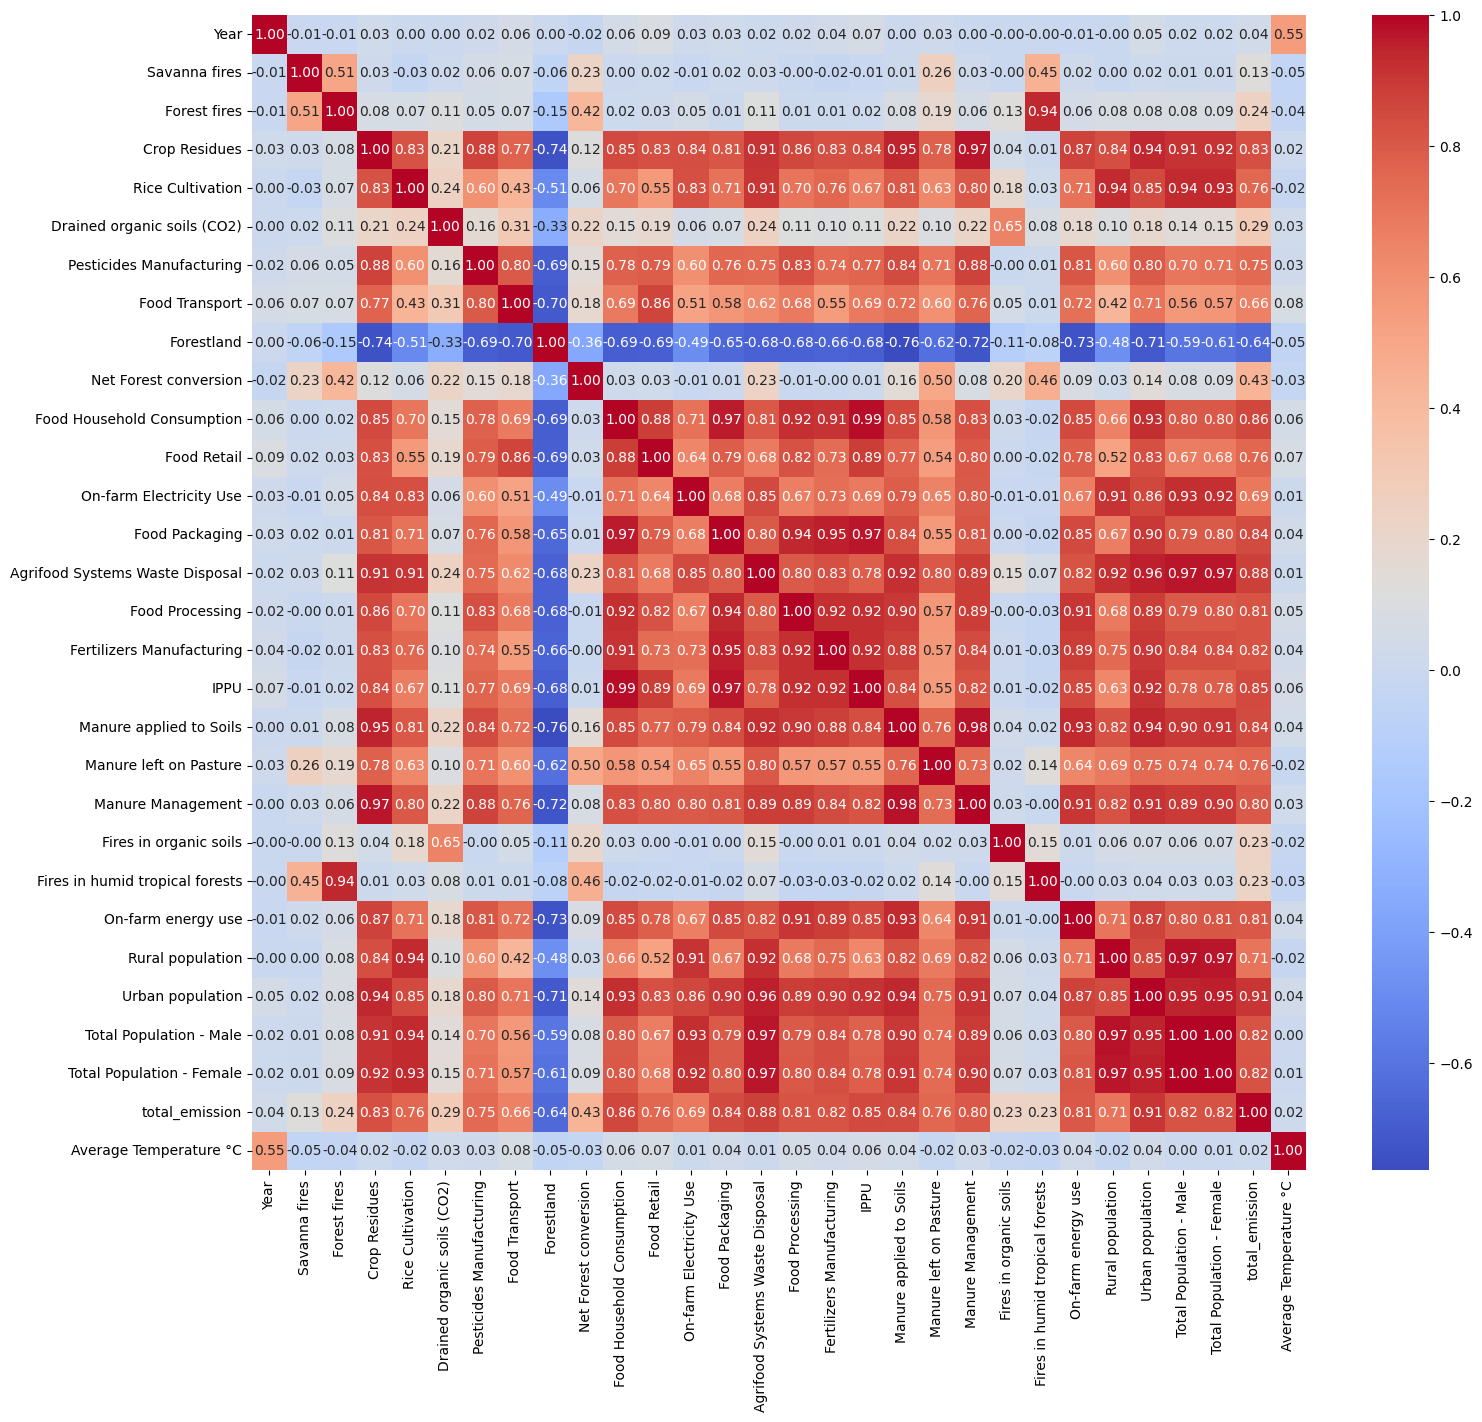

In [11]:
dfnew = df_src.copy()
dfnew = dfnew.drop(['Area'], axis=1)
corr = dfnew.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show

# **Conocimiento de datos**

In [12]:
df_src['Area'].unique()
df_src['Area'].value_counts()

,count
Area,
Afghanistan,31
Isle of Man,31
Montserrat,31
Morocco,31
Mozambique,31
...,...
Czechoslovakia,3
Ethiopia PDR,3
USSR,2


In [13]:
df_src.isnull().sum()

,0
Area,0
Year,0
Savanna fires,31
Forest fires,93
Crop Residues,1389
Rice Cultivation,0
Drained organic soils (CO2),0
Pesticides Manufacturing,0
Food Transport,0
Forestland,493


In [14]:
df_src.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [15]:
df_src["Savanna fires"].fillna(df_src["Savanna fires"].mean(), inplace = True)
df_src["Forest fires"].fillna(df_src["Forest fires"].mean(), inplace = True)
df_src["Crop Residues"].fillna(df_src["Crop Residues"].mean(), inplace = True)
df_src["Forestland"].fillna(df_src["Forestland"].mean(), inplace = True)
df_src["Net Forest conversion"].fillna(df_src["Net Forest conversion"].mean(), inplace = True)
df_src["Food Household Consumption"].fillna(df_src["Food Household Consumption"].mean(), inplace = True)
df_src["IPPU"].fillna(df_src["IPPU"].mean(), inplace = True)
df_src["Manure applied to Soils"].fillna(df_src["Manure applied to Soils"].mean(), inplace = True)
df_src["Manure Management"].fillna(df_src["Manure Management"].mean(), inplace = True)
df_src["Fires in humid tropical forests"].fillna(df_src["Fires in humid tropical forests"].mean(), inplace = True)
df_src["On-farm energy use"].fillna(df_src["On-farm energy use"].mean(), inplace = True)

#**Analisis de datos**

In [16]:
df_src.columns = df_src.columns.str.replace(' ', '_')
df_src.columns = df_src.columns.str.replace('-', '')
df_src.columns = df_src.columns.str.replace(r'_\(CO2\)', '')
df_src.columns = df_src.columns.str.replace(r'_°C', '')

df_src = df_src.iloc[:,1:]

df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             6965 non-null   int64  
 1   Savanna_fires                    6965 non-null   float64
 2   Forest_fires                     6965 non-null   float64
 3   Crop_Residues                    6965 non-null   float64
 4   Rice_Cultivation                 6965 non-null   float64
 5   Drained_organic_soils_(CO2)      6965 non-null   float64
 6   Pesticides_Manufacturing         6965 non-null   float64
 7   Food_Transport                   6965 non-null   float64
 8   Forestland                       6965 non-null   float64
 9   Net_Forest_conversion            6965 non-null   float64
 10  Food_Household_Consumption       6965 non-null   float64
 11  Food_Retail                      6965 non-null   float64
 12  Onfarm_Electricity_U

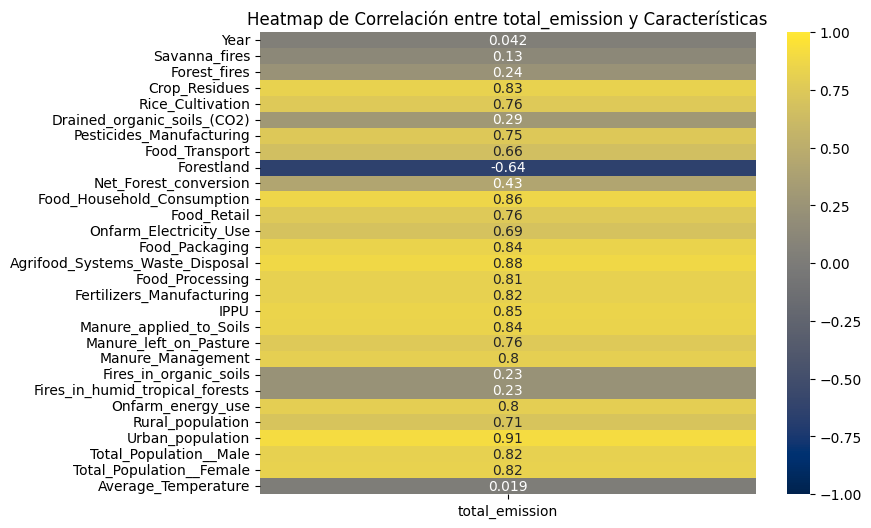

In [17]:
variable_salida = 'total_emission'
caracteristicas = df_src.drop(columns=[variable_salida])

# Añade la variable de salida al DataFrame de características para la correlación
df_correlacion = pd.concat([caracteristicas, df_src[variable_salida]], axis=1)

# Paso 2: Calcula la correlación
correlacion = df_correlacion.corr()
correlacion_salida = correlacion[[variable_salida]].iloc[:-1, :]

# Paso 3: Crea el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_salida, annot=True, cmap='cividis', vmin=-1, vmax=1)
plt.title('Heatmap de Correlación entre total_emission y Características')
plt.show()

**Solucion Planteada**


*  Para abordar la problemática de las emisiones destacada en el análisis de los datos del conjunto de datos, se propone el desarrollo e implementación de políticas y regulaciones específicas. Estas medidas tienen como objetivo principal reducir significativamente el total de emisiones
*   Sugerencia de normas espeficias
*  Incentivos para empresas o entidades relacionadas a la produccion de CO2
*  Educacion y capacitacion


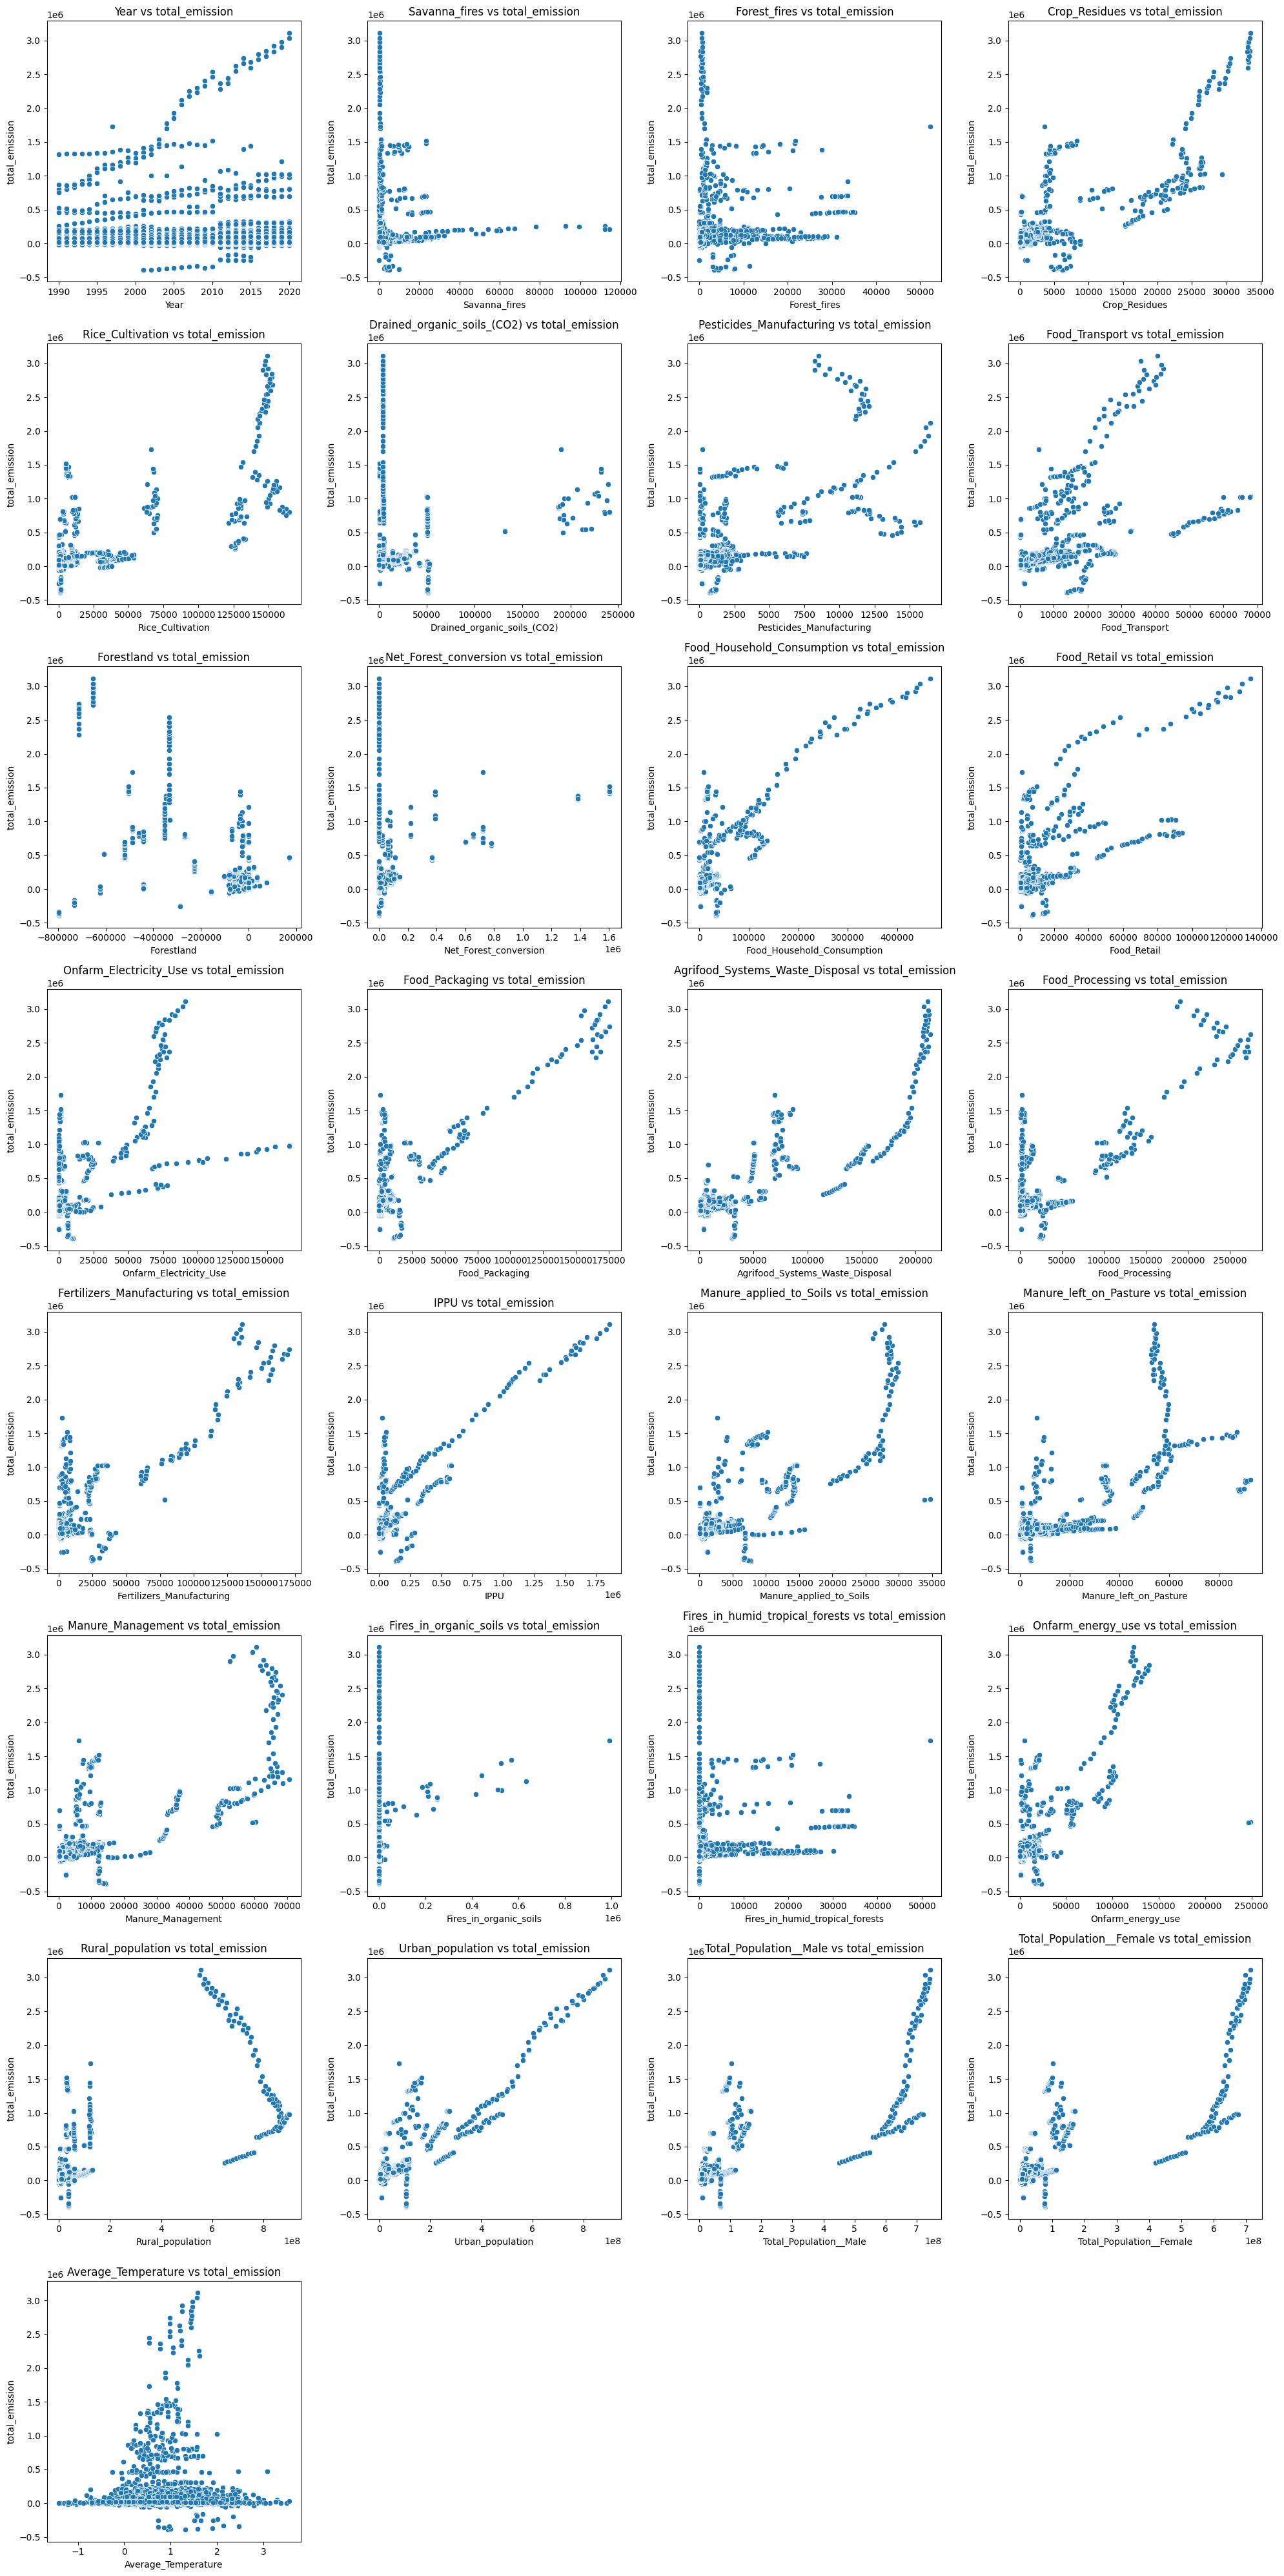

In [18]:
variable_salida = 'total_emission'

# Selecciona las variables independientes
variables_independientes = df_src.drop(columns=[variable_salida])

# Configura el tamaño de la figura y el diseño de subgráficos
n = len(variables_independientes.columns)
ncols = 4  # Número de columnas en el diseño de subgráficos
nrows = int(np.ceil(n / ncols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))

# Aplana el array de ejes para facilitar la iteración
axes = axes.flatten()

# Itera sobre las variables independientes y crea gráficos de dispersión
for i, variable in enumerate(variables_independientes.columns):
    sns.scatterplot(x=df_src[variable], y=df_src[variable_salida], ax=axes[i])
    axes[i].set_title(f'{variable} vs {variable_salida}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel(variable_salida)

# Desactiva los ejes restantes si hay menos variables que subgráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajusta el layout para evitar superposiciones
plt.tight_layout()
plt.show()

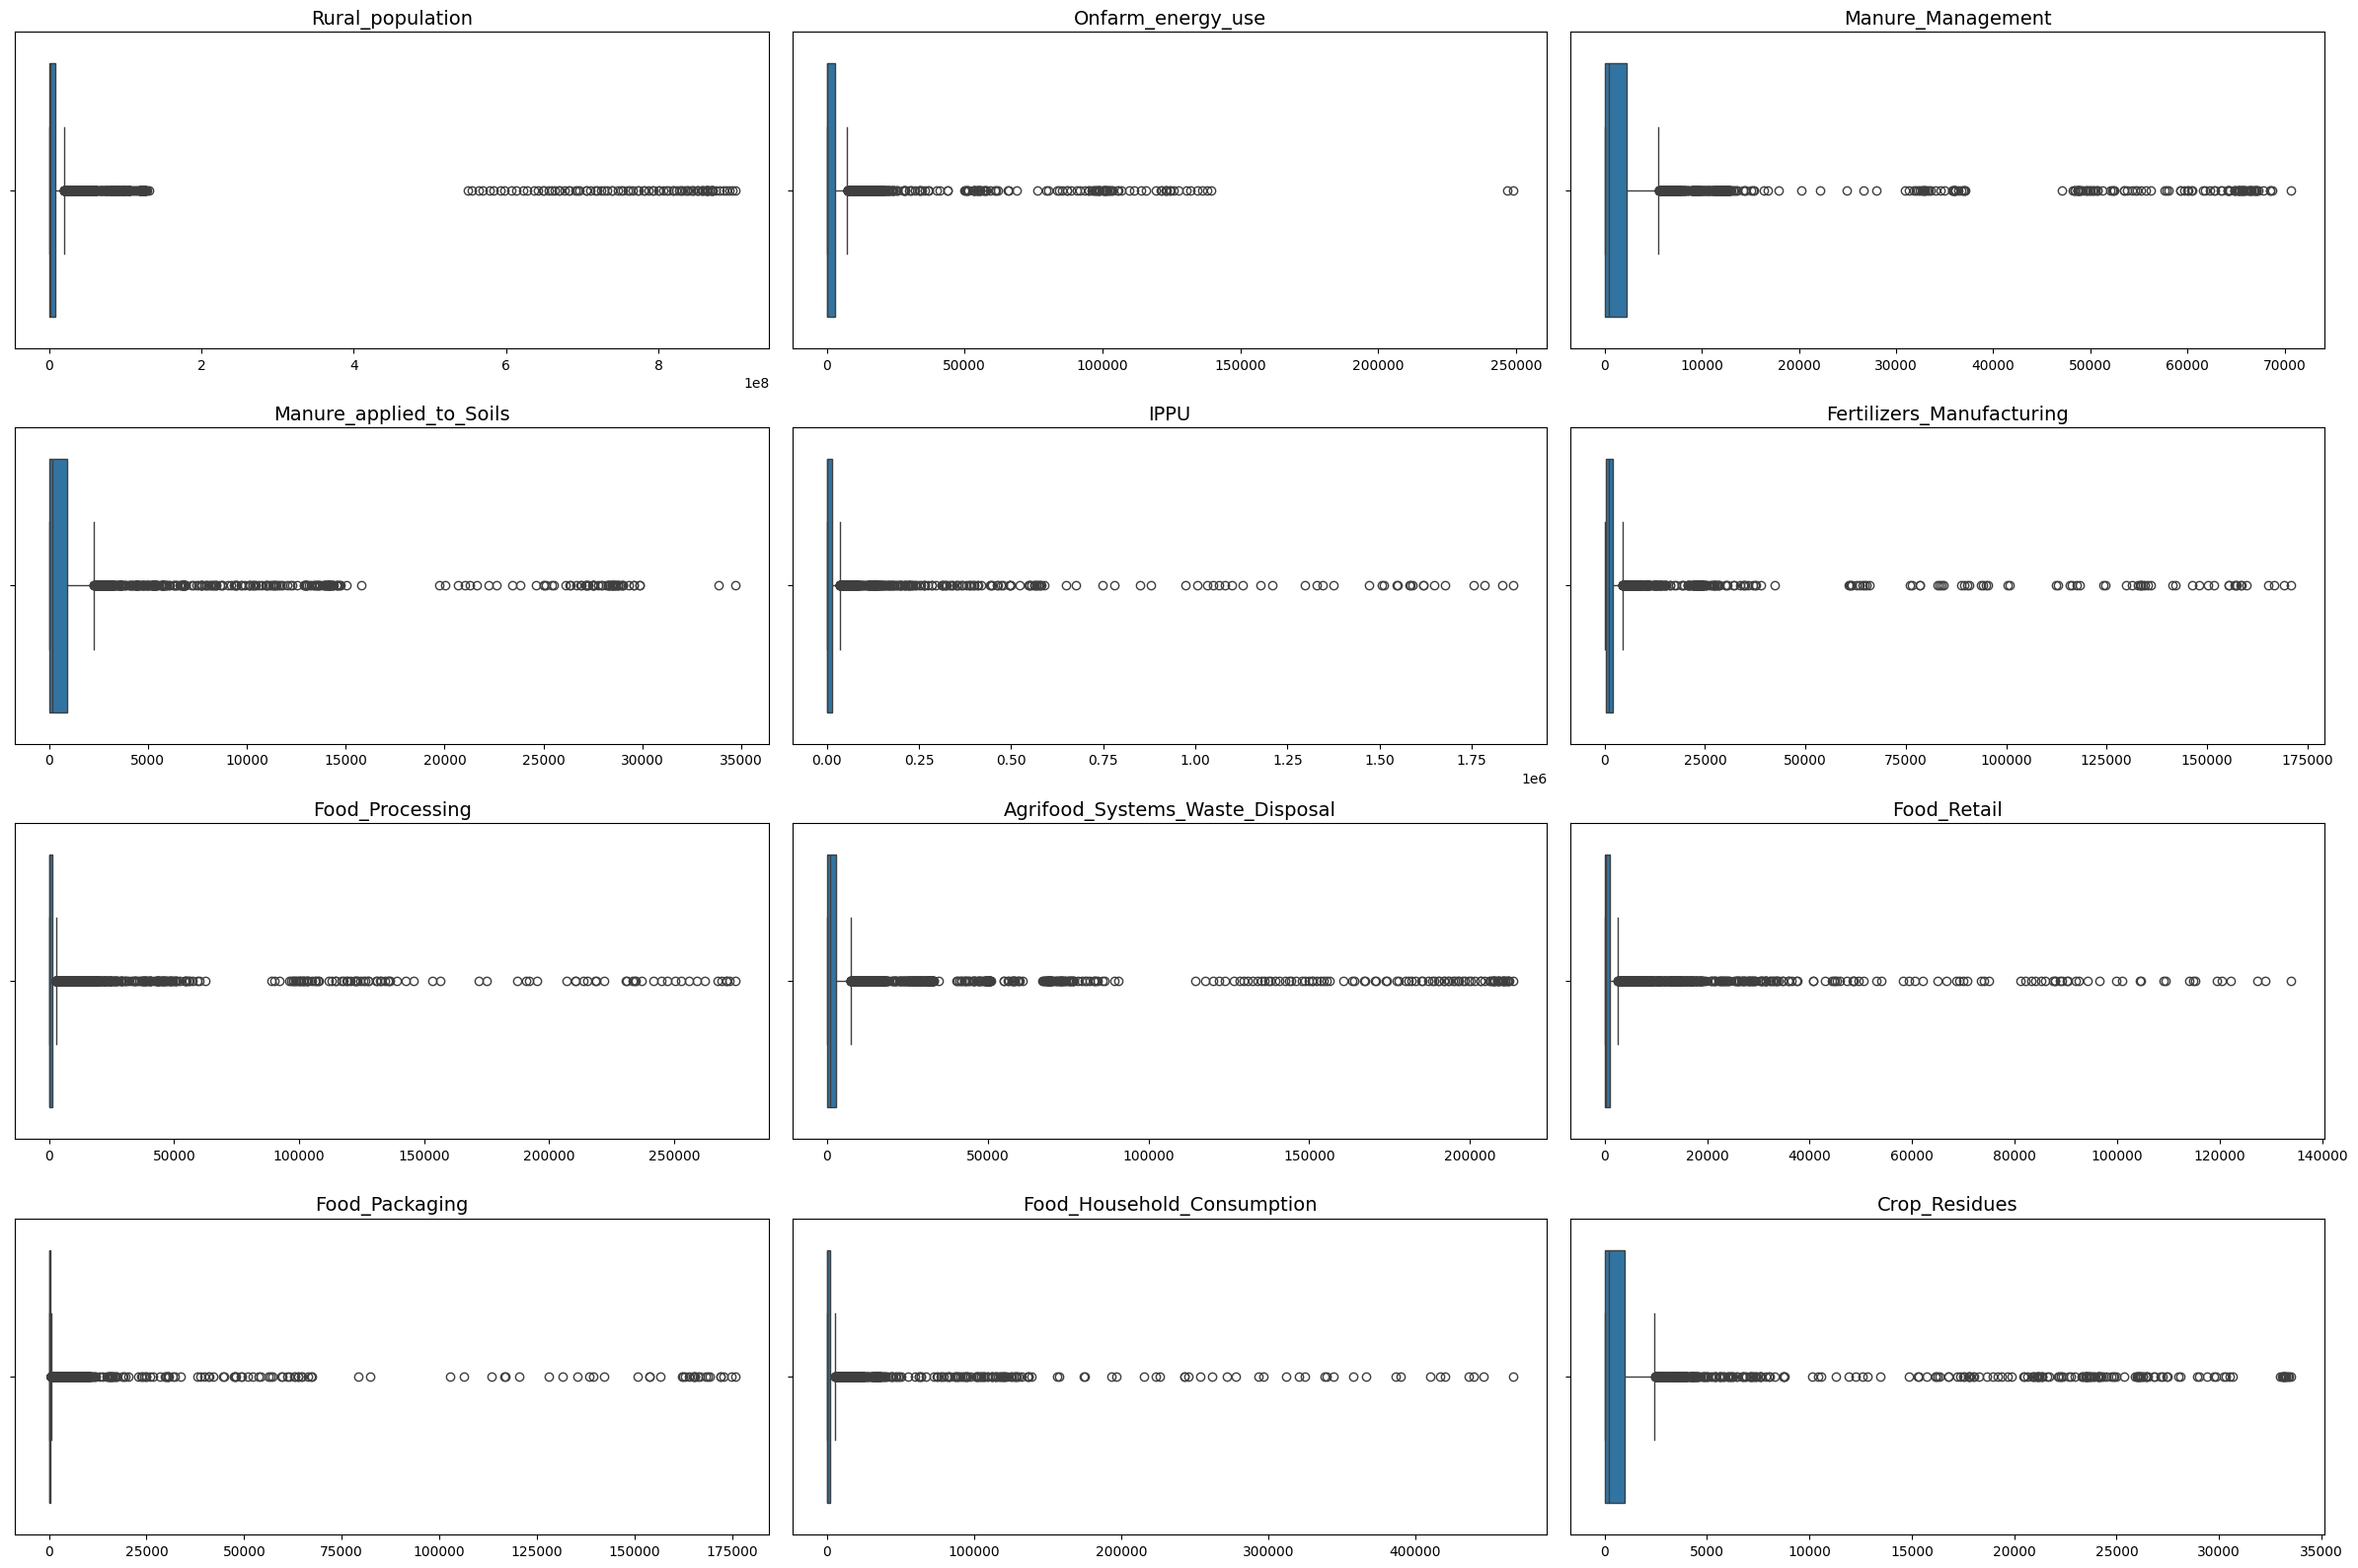

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables para graficar
variables = [
    'Rural_population', 'Onfarm_energy_use', 'Manure_Management',
    'Manure_applied_to_Soils', 'IPPU', 'Fertilizers_Manufacturing',
    'Food_Processing', 'Agrifood_Systems_Waste_Disposal', 'Food_Retail',
    'Food_Packaging', 'Food_Household_Consumption', 'Crop_Residues'
]

# Crear una figura más grande
plt.figure(figsize=(24, 16))

# Crear subgráficos para cada variable
for i, var in enumerate(variables):
    plt.subplot(4, 3, i + 1)  # 4 filas y 3 columnas
    sns.boxplot(x=df_src[var])
    plt.title(var, fontsize=14)
    plt.xlabel('')  # Elimina la etiqueta del eje x para una apariencia más limpia

plt.tight_layout()
plt.show()


<Axes: xlabel='Year', ylabel='total_emission'>

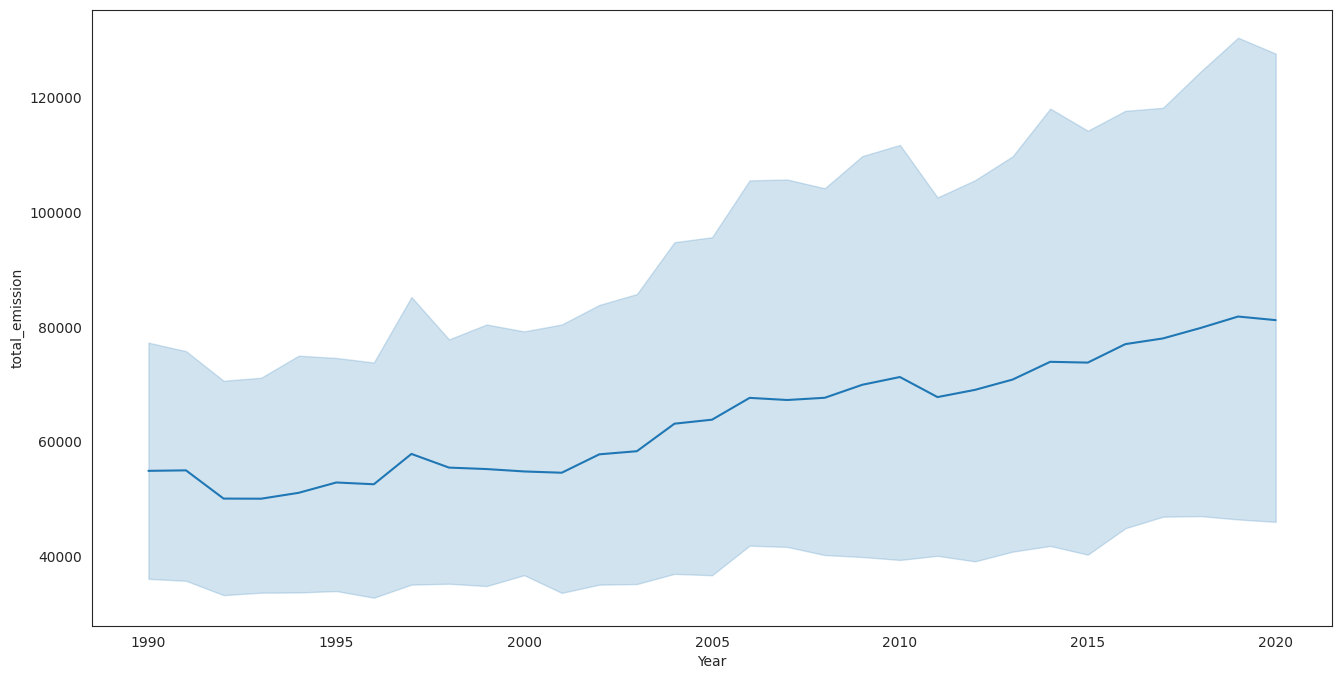

In [20]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=df_src, x='Year', y='total_emission', ax=ax)


In [21]:
y = df_src.pop('total_emission')
y = pd.DataFrame(y, columns = ['total_emission'])
df = pd.concat([df_src, y], axis=1)

In [22]:
!pip install pycaret[full]

In [23]:
from pycaret.regression import *

s = setup(df, target = 'total_emission', session_id = 123)
print(df.columns)

,Description,Value
0,Session id,123
1,Target,total_emission
2,Target type,Regression
3,Original data shape,"(6965, 30)"
4,Transformed data shape,"(6965, 30)"
5,Transformed train set shape,"(4875, 30)"
6,Transformed test set shape,"(2090, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


Index(['Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'Average_Temperature', 'total_emission'],
      dtype='object')


In [24]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,4553.1907,42648123.1339,6525.6365,0.9990,0.8696,0.6860,0.6130
lasso,Lasso Regression,4566.1507,42945041.3235,6548.3431,0.9990,0.8579,0.6992,0.1570
ridge,Ridge Regression,4553.1861,42648093.5417,6525.6343,0.9990,0.8694,0.6860,0.0390
en,Elastic Net,4567.3923,43010872.5463,6553.4265,0.9990,0.8714,0.6974,0.1560
llar,Lasso Least Angle Regression,4553.1730,42648057.0029,6525.6319,0.9990,0.8699,0.6860,0.0720
br,Bayesian Ridge,4555.3043,42744662.5932,6532.8983,0.9990,0.8961,0.6867,0.0690
et,Extra Trees Regressor,2217.1369,226879371.3224,12348.7011,0.9959,0.1385,0.0638,3.7560
gbr,Gradient Boosting Regressor,6969.9026,360130607.1011,18369.1942,0.9922,0.5339,0.6238,3.8360
catboost,CatBoost Regressor,3812.0295,401125078.3298,18485.3491,0.9910,0.2386,0.1663,11.1300
rf,Random Forest Regressor,3845.6173,487302219.1492,19914.7865,0.9904,0.2092,0.1084,14.0640


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [25]:
print(best)

LinearRegression(n_jobs=-1)


In [26]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print(f'Tamaño de entrenamiento: {len(train_df)}')
print(f'Tamaño de validación: {len(val_df)}')
print(f'Tamaño de prueba: {len(test_df)}')

Tamaño de entrenamiento: 4875
Tamaño de validación: 1045
Tamaño de prueba: 1045


In [28]:
X_train = train_df.drop('total_emission', axis=1)
y_train = train_df['total_emission']

X_test = val_df.drop('total_emission', axis=1)
y_test = val_df['total_emission']

X_val = test_df.drop('total_emission', axis=1)
y_val = test_df['total_emission']

In [29]:
X_train.head()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,Onfarm_energy_use,Rural_population,Urban_population,Total_Population__Male,Total_Population__Female,Average_Temperature
3992,2019,92.6691,0.0000,35.4025,574.170200,0.0000,1.000000,190.6911,-1750.966800,668.478800,...,2640.570600,311.026300,0.0,0.0,211.0346,2120517.0,2540632.0,2145130.0,2238719.0,1.444583
3819,2000,0.0000,0.0000,0.0064,558.225029,0.0000,2.000000,23.5972,0.000000,0.000000,...,2313.955884,2263.344946,0.0,0.0,43.2900,202701.0,77683.0,145914.0,136593.0,0.285250
2114,2011,48.9161,28.6501,4.8304,0.413600,0.0000,11.576494,68.1143,-483.228100,349.529600,...,300.376500,29.847400,0.0,0.0,36.7954,947124.0,278134.0,537868.0,567504.0,0.834300
47,2006,0.6030,0.0000,30.7903,265.097916,110.4274,0.000000,222.3144,-1233.285900,0.000000,...,379.620000,555.858700,0.0,0.0,460.8339,1593892.0,1460439.0,1496029.0,1507358.0,0.360833
4836,1994,0.1449,0.0000,2.9756,246.407276,0.0000,21.000000,45.0006,-17828.285678,17605.641889,...,84.470200,8.374000,0.0,0.0,9.8011,757236.0,1743842.0,1265608.0,1249556.0,0.473250


In [30]:
X_train.isnull().sum()

,0
Year,0
Savanna_fires,0
Forest_fires,0
Crop_Residues,0
Rice_Cultivation,0
Drained_organic_soils_(CO2),0
Pesticides_Manufacturing,0
Food_Transport,0
Forestland,0
Net_Forest_conversion,0


In [31]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
OLSres = smf.ols('total_emission ~ Urban_population', data=train_df).fit()
print(OLSres.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 1.933e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:26:35   Log-Likelihood:                -62742.
No. Observations:                4875   AIC:                         1.255e+05
Df Residuals:                    4873   BIC:                         1.255e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.037e+04   1393.326  

In [32]:
from statsmodels.tools.eval_measures import rmse

# fit your model which you have already done

# now generate predictions
ypred = OLSres.predict(X_test)

# calc rmse
rmse_ols = rmse(y_test, ypred)
print(rmse_ols)

100202.14893321024


In [33]:
OLS1 = smf.ols('total_emission ~ Urban_population', data=train_df).fit()
OLS2 = smf.ols('total_emission ~ Urban_population + Onfarm_energy_use + IPPU', data=train_df).fit()
OLS3 = smf.ols('total_emission ~ Urban_population + Onfarm_energy_use + IPPU + Manure_Management + Food_Processing + Average_Temperature, Year, Food_Household_Consumption', data=train_df).fit()

In [34]:
from statsmodels.tools.eval_measures import rmse

ypred = OLS2.predict(X_test)

# calc rmse
rmse_mlr2 = rmse(y_test, ypred)
print("OLS2 rmse", rmse_mlr2)
ypred = OLS3.predict(X_test)
rmse_mlr3 = rmse(y_test, ypred)
print("OLS3 rmse", rmse_mlr3)

OLS2 rmse 100229.79334367097
OLS3 rmse 98973.41708921912


In [35]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'BIC' : lambda x: f"{x.bic:.2f}", #dictionary. lambda is one way to define a function. include parameter and result. BIC in name of function. x is parameter. after : is function.
           # f"{x.bic:.2f} is result of formula
           #.2f means until second decimal place of float
           #plug in OLS1 for x, returns BIC of first regression. BIC similar to R^2
           'AIC' : lambda x: f"{x.aic:.2f}",
    'No. observations' : lambda x: f"{int(x.nobs):d}"}
        #nobs is number of observations

# "dictionary" is another way to store data, which use "keys" to index elements (instead of numbers): key-value pair

results_table = summary_col(results=[OLS1,OLS2,OLS3],
                            float_format='%0.2f', #specifies data/number type. f means float and include up to second decimal place
                            stars = True, #include stars
                            model_names=['Model 1', #names each model
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'Top10perc',
                                             'Private',
                                             'Outstate',
                                             'Personal',
                                             'Expend'])

results_table.add_title('OLS Regressions') #adds title

print(results_table) #prints table

                   OLS Regressions
                    Model 1     Model 2     Model 3  
-----------------------------------------------------
Intercept         10373.20*** 11461.86*** 13808.35***
                  (1393.33)   (1389.19)   (1390.75)  
Urban_population  0.00***     0.00***     0.00***    
                  (0.00)      (0.00)      (0.00)     
Onfarm_energy_use             -0.05       1.54***    
                              (0.22)      (0.28)     
IPPU                          0.32***     0.18***    
                              (0.03)      (0.04)     
Manure_Management                         -6.68***   
                                          (0.58)     
Food_Processing                           0.57**     
                                          (0.23)     
R-squared         0.80        0.80        0.81       
R-squared Adj.    0.80        0.80        0.81       
BIC               125501.77   125423.45   125304.94  
AIC               125488.79   125397.48   12526

In [40]:
X_train.head()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,Onfarm_energy_use,Rural_population,Urban_population,Total_Population__Male,Total_Population__Female,Average_Temperature
3992,2019,92.6691,0.0000,35.4025,574.170200,0.0000,1.000000,190.6911,-1750.966800,668.478800,...,2640.570600,311.026300,0.0,0.0,211.0346,2120517.0,2540632.0,2145130.0,2238719.0,1.444583
3819,2000,0.0000,0.0000,0.0064,558.225029,0.0000,2.000000,23.5972,0.000000,0.000000,...,2313.955884,2263.344946,0.0,0.0,43.2900,202701.0,77683.0,145914.0,136593.0,0.285250
2114,2011,48.9161,28.6501,4.8304,0.413600,0.0000,11.576494,68.1143,-483.228100,349.529600,...,300.376500,29.847400,0.0,0.0,36.7954,947124.0,278134.0,537868.0,567504.0,0.834300
47,2006,0.6030,0.0000,30.7903,265.097916,110.4274,0.000000,222.3144,-1233.285900,0.000000,...,379.620000,555.858700,0.0,0.0,460.8339,1593892.0,1460439.0,1496029.0,1507358.0,0.360833
4836,1994,0.1449,0.0000,2.9756,246.407276,0.0000,21.000000,45.0006,-17828.285678,17605.641889,...,84.470200,8.374000,0.0,0.0,9.8011,757236.0,1743842.0,1265608.0,1249556.0,0.473250


In [42]:
X_train = X_train[['Urban_population', 'Onfarm_energy_use', 'IPPU', 'Manure_Management', 'Food_Processing', 'Average_Temperature', 'Year', 'Food_Household_Consumption']] # Use a list of column names to select multiple columns
X_test = X_test[['Urban_population', 'Onfarm_energy_use', 'IPPU', 'Manure_Management', 'Food_Processing', 'Average_Temperature', 'Year', 'Food_Household_Consumption']] # Use a list of column names to select multiple columns
X_val = X_val[['Urban_population', 'Onfarm_energy_use', 'IPPU', 'Manure_Management', 'Food_Processing', 'Average_Temperature', 'Year', 'Food_Household_Consumption']] # Use a list of column names to select multiple columns
X_train.head()

,Urban_population,Onfarm_energy_use,IPPU,Manure_Management,Food_Processing,Average_Temperature,Year,Food_Household_Consumption
3992,2540632.0,211.0346,28.257900,311.026300,275.237577,1.444583,2019,164.2059
3819,77683.0,43.2900,2.002400,2263.344946,451.196291,0.285250,2000,10.5905
2114,278134.0,36.7954,11.155500,29.847400,347.743500,0.834300,2011,65.8534
47,1460439.0,460.8339,501.001900,555.858700,121.435000,0.360833,2006,107.6431
4836,1743842.0,9.8011,19991.498031,8.374000,332.523332,0.473250,1994,130.3616


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_val_standardized = scaler_standard.transform(X_val)
X_test_standardized = scaler_standard.transform(X_test)

# Convert y_train to a NumPy array before reshaping
y_train_standardized = scaler_standard.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_standardized = scaler_standard.transform(y_val.to_numpy().reshape(-1, 1))
y_test_standardized = scaler_standard.transform(y_test.to_numpy().reshape(-1, 1))

# Normalizar (opcional, si también deseas normalizar)
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train_standardized)
X_val_normalized = scaler_minmax.transform(X_val_standardized)
X_test_normalized = scaler_minmax.transform(X_test_standardized)

y_train_normalized = scaler_minmax.fit_transform(y_train_standardized)
y_val_normalized = scaler_minmax.transform(y_val_standardized)
y_test_normalized = scaler_minmax.transform(y_test_standardized)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()
model.fit(X_train_standardized, y_train_standardized)
y_pred = model.predict(X_test_standardized)
mse = mean_squared_error(y_test_standardized, y_pred)
rmse = mean_squared_error(y_test_standardized, y_pred, squared=False)
r2 = r2_score(y_test_standardized, y_pred)
resultados = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'R^2'],
    'Valor': [mse, rmse, r2]
})

print("Coeficientes del modelo:")
for name, coef in zip(X_train.columns, model.coef_):
    print(f'{name}: {coef}')

print("\nIntercepto del modelo:", model.intercept_)
print("\nResultados de la regresión:")
print(resultados)


Coeficientes del modelo:
Urban_population: [ 0.89641517  0.08576707 -0.06128546 -0.23602218  0.04390963 -0.01786814
  0.0023971   0.17329415]

Intercepto del modelo: [-3.69493995e-17]

Resultados de la regresión:
  Métrica     Valor
0     MSE  0.221007
1    RMSE  0.470114
2     R^2  0.823969


In [54]:
model = LinearRegression()
model.fit(X_train_standardized, y_train_standardized)
y_pred = model.predict(X_val_standardized)
mse = mean_squared_error(y_val_standardized, y_pred)
rmse = mean_squared_error(y_val_standardized, y_pred, squared=False)
r2 = r2_score(y_val_standardized, y_pred)
resultados = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'R^2'],
    'Valor': [mse, rmse, r2]
})

print("Coeficientes del modelo:")
for name, coef in zip(X_train.columns, model.coef_):
    print(f'{name}: {coef}')

print("\nIntercepto del modelo:", model.intercept_)
print("\nResultados de la regresión:")
print(resultados)


Coeficientes del modelo:
Urban_population: [ 0.89641517  0.08576707 -0.06128546 -0.23602218  0.04390963 -0.01786814
  0.0023971   0.17329415]

Intercepto del modelo: [-3.69493995e-17]

Resultados de la regresión:
  Métrica     Valor
0     MSE  0.218540
1    RMSE  0.467483
2     R^2  0.889818


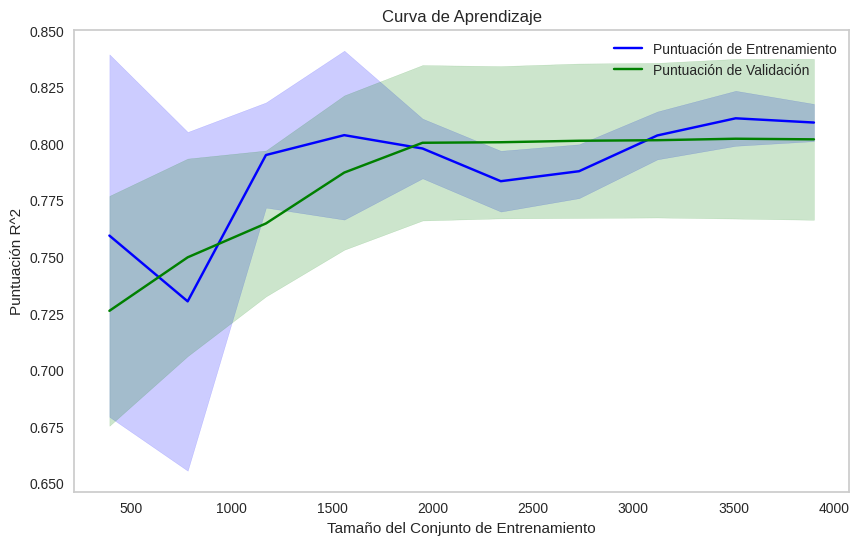

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Asumiendo que ya tienes tus conjuntos de datos: X_train, y_train, X_val, y_val, X_test, y_test

# Inicializa el modelo
model = LinearRegression()

# Genera la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_standardized, y_train_standardized,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Utiliza validación cruzada
    scoring='r2',  # Métrica a evaluar
    n_jobs=-1  # Utiliza todos los núcleos disponibles
)

# Calcula la media y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntuación de Entrenamiento', color='blue')
plt.plot(train_sizes, val_mean, label='Puntuación de Validación', color='green')

# Grafica las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

# Configuración del gráfico
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación R^2')
plt.legend()
plt.grid()
plt.show()


In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define y ajusta el modelo Lasso
model = Lasso(alpha=0.5)  # Puedes ajustar el valor de alpha para regularización
model.fit(X_train, y_train)

# Realiza predicciones
y_pred = model.predict(X_test)

# Calcula métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Crea un DataFrame con los resultados de las métricas
resultados = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'R^2'],
    'Valor': [mse, rmse, r2]
})

# Imprime los coeficientes del modelo
print("Coeficientes del modelo (Lasso):")
for name, coef in zip(X_train.columns, model.coef_):
    print(f'{name}: {coef}')

# Imprime el intercepto del modelo
print("\nIntercepto del modelo (Lasso):", model.intercept_)

# Imprime los resultados de la regresión
print("\nResultados de la regresión (Lasso):")
print(resultados)



Coeficientes del modelo (Lasso):
Urban_population: 0.0030680629720930826
Onfarm_energy_use: 1.5654842904034412
IPPU: -0.13921658767934422
Manure_Management: -6.763614181899591
Food_Processing: 0.49938508200106324
Average_Temperature: -6752.638831192253
Year: 56.339870446438276
Food_Household_Consumption: 1.6673961111267854

Intercepto del modelo (Lasso): -92981.39764488893

Resultados de la regresión (Lasso):
  Métrica         Valor
0     MSE  9.704128e+09
1    RMSE  9.850953e+04
2     R^2  8.239688e-01


In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Inicializa el modelo de regresión Lasso
model = Lasso(alpha=0.5)  # Puedes ajustar alpha según sea necesario

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones con los datos de validación
y_pred = model.predict(X_val)

# Calcula las métricas
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Crea un DataFrame con los resultados
resultados = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'R^2'],
    'Valor': [mse, rmse, r2]
})

# Imprime los coeficientes del modelo
print("Coeficientes del modelo:")
for name, coef in zip(X_train.columns, model.coef_):
    print(f'{name}: {coef}')

# Imprime el intercepto del modelo
print("\nIntercepto del modelo:", model.intercept_)

# Imprime los resultados de la regresión
print("\nResultados de la regresión:")
print(resultados)


Coeficientes del modelo:
Urban_population: 0.0030680629720930826
Onfarm_energy_use: 1.5654842904034412
IPPU: -0.13921658767934422
Manure_Management: -6.763614181899591
Food_Processing: 0.49938508200106324
Average_Temperature: -6752.638831192253
Year: 56.339870446438276
Food_Household_Consumption: 1.6673961111267854

Intercepto del modelo: -92981.39764488893

Resultados de la regresión:
  Métrica         Valor
0     MSE  9.595816e+09
1    RMSE  9.795824e+04
2     R^2  8.898177e-01


In [ ]:
X_train.head()